## 画模型权重分布图

In [1]:
import torch
from transformers import AutoModelForCausalLM

/node6_1/tanshuai/.conda/envs/abc/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = AutoModelForCausalLM.from_pretrained("/node6_1/tanshuai/ZhipuAI/chatglm3-6b-base", trust_remote_code=True, low_cpu_mem_usage=True)
# model = AutoModelForCausalLM.from_pretrained("/node6_1/tanshuai/modelscope/Llama-2-7b-ms", low_cpu_mem_usage=True)

Loading checkpoint shards: 100%|██████████| 7/7 [00:01<00:00,  5.08it/s]


In [3]:
def get_weights(model):
    weights = []
    for param in model.parameters():
        weights.append(param.view(-1))  # 将每个展平后的参数（即一维张量）添加到weights列表中
    return torch.cat(weights)  # 将weights列表中所有一维张量拼接（concatenate）成一个大的单一张量

In [4]:
weights = get_weights(model)

In [ ]:
# chatglm3参数类型float32，llama2参数类型float16
weights.dtype

torch.float16

In [6]:
weights.float().dtype  # .float()将张量的数据类型转换为float32

torch.float32

In [8]:
# 数据会被分为 200 个小区间
# range=(-0.1, 0.1) 设置了直方图的计算范围，表示你关心的 weights 数据值的范围是从 -0.1 到 0.1
hist = torch.histogram(weights.float(), bins=200, range=(-0.1, 0.1))
# 返回的是一个包含两个元素的元组：
# 第一个元素 是每个 bin 中的频数（即该区间内的元素个数）
# 第二个元素 是每个 bin 的边界（即每个区间的左边界和右边界）

In [9]:
hist[0].shape, hist[1].shape

(torch.Size([200]), torch.Size([201]))

In [9]:
hist

torch.return_types.histogram(
hist=tensor([1.1834e+04, 1.2638e+04, 1.3923e+04, 1.4936e+04, 1.6178e+04, 1.7791e+04,
        1.9224e+04, 2.0962e+04, 2.3174e+04, 2.5098e+04, 2.7669e+04, 3.0698e+04,
        3.4044e+04, 3.7414e+04, 4.2058e+04, 4.6247e+04, 8.0139e+04, 6.1523e+04,
        6.9235e+04, 7.7600e+04, 8.7284e+04, 9.9374e+04, 1.1247e+05, 1.2727e+05,
        1.4439e+05, 1.6528e+05, 1.8832e+05, 2.1393e+05, 2.4554e+05, 2.8072e+05,
        3.2181e+05, 3.6792e+05, 4.2236e+05, 4.8441e+05, 5.5204e+05, 6.3381e+05,
        7.2561e+05, 1.1739e+06, 1.0021e+06, 1.1461e+06, 1.3087e+06, 1.4924e+06,
        1.7055e+06, 1.9433e+06, 2.2090e+06, 2.5128e+06, 2.8552e+06, 4.1026e+06,
        3.7735e+06, 4.2667e+06, 4.8180e+06, 5.4237e+06, 6.0994e+06, 6.8457e+06,
        7.6692e+06, 8.5843e+06, 9.5804e+06, 1.0681e+07, 1.5047e+07, 1.3523e+07,
        1.4974e+07, 1.6548e+07, 1.8244e+07, 2.0095e+07, 2.2053e+07, 2.4168e+07,
        2.6418e+07, 2.8815e+07, 3.7544e+07, 3.4602e+07, 3.7486e+07, 4.0495e+07,
     

In [10]:
hist.hist, hist.bin_edges

(tensor([1.1834e+04, 1.2638e+04, 1.3923e+04, 1.4936e+04, 1.6178e+04, 1.7791e+04,
         1.9224e+04, 2.0962e+04, 2.3174e+04, 2.5098e+04, 2.7669e+04, 3.0698e+04,
         3.4044e+04, 3.7414e+04, 4.2058e+04, 4.6247e+04, 8.0139e+04, 6.1523e+04,
         6.9235e+04, 7.7600e+04, 8.7284e+04, 9.9374e+04, 1.1247e+05, 1.2727e+05,
         1.4439e+05, 1.6528e+05, 1.8832e+05, 2.1393e+05, 2.4554e+05, 2.8072e+05,
         3.2181e+05, 3.6792e+05, 4.2236e+05, 4.8441e+05, 5.5204e+05, 6.3381e+05,
         7.2561e+05, 1.1739e+06, 1.0021e+06, 1.1461e+06, 1.3087e+06, 1.4924e+06,
         1.7055e+06, 1.9433e+06, 2.2090e+06, 2.5128e+06, 2.8552e+06, 4.1026e+06,
         3.7735e+06, 4.2667e+06, 4.8180e+06, 5.4237e+06, 6.0994e+06, 6.8457e+06,
         7.6692e+06, 8.5843e+06, 9.5804e+06, 1.0681e+07, 1.5047e+07, 1.3523e+07,
         1.4974e+07, 1.6548e+07, 1.8244e+07, 2.0095e+07, 2.2053e+07, 2.4168e+07,
         2.6418e+07, 2.8815e+07, 3.7544e+07, 3.4602e+07, 3.7486e+07, 4.0495e+07,
         4.3664e+07, 5.3062e

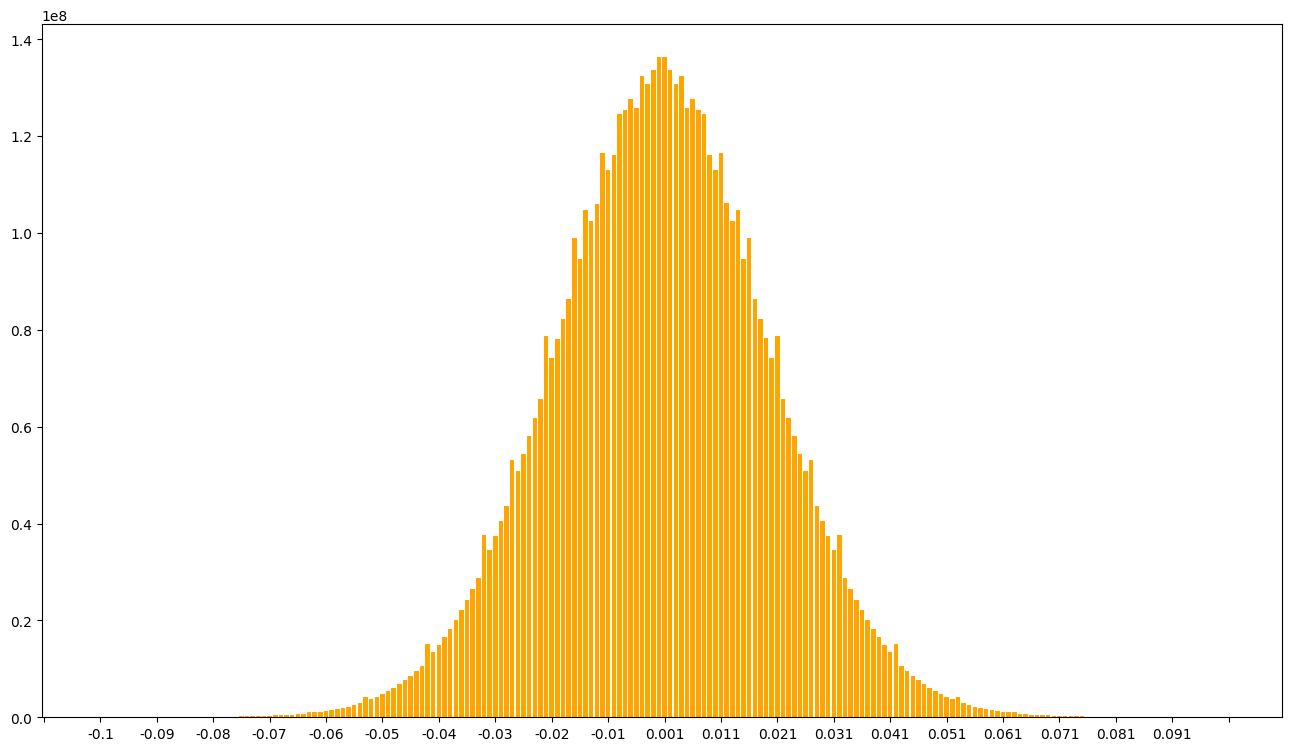

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

x = range(200)
plt.figure(figsize=(16, 9))
plt.bar(x, hist.hist.detach().numpy(), color="orange")
# plt.xticks(x, np.linspace(-1, 1, 200).round(3))
plt.xticks(x, np.linspace(-0.1, 0.1, 200).round(3))  # 设置 x 轴的刻度（ticks）位置和对应的标签
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
# plt.savefig('llama2.png', dpi=300)  # 保存为 PNG 格式，分辨率为 300 dpi
plt.savefig('chatglm3.png', dpi=300) 
plt.show()